In [1]:
#importing packages
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import numpy as np


Using TensorFlow backend.


In [0]:
#loading the dataset....X_train contains training images (50000)...y_train contains training labels (50000)...X_test contains test images.....y_test contains test labels
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#print Input shape
input_shape = X_train[0].shape

#concating train and test images in to x, train and test labels in to y.............
x = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

#Z score for Normalization...............
mean=np.mean(x, axis=(0,1,2,3))
std=np.std(x, axis=(0,1,2,3))
x=(x-mean)/(std+1e-7)


In [0]:
from sklearn.model_selection import StratifiedKFold
from keras import regularizers
from keras.callbacks import LearningRateScheduler
from keras.layers import BatchNormalization


#Using Stratified Kfold cross validation with k as 10...................
#In Each iteration k-1 folds are used for training ,and the rest one is used for validation...This process will repeat for 10 iterations since k=10

kfold=StratifiedKFold(n_splits=10,shuffle=True)

#Defining the model............

weight_decay = 1e-4 #Declaring weight_decay globally
def get_model():
  model = Sequential()
  #Convoluting the image 32*32*3 with 3*3 filtersize and 32 filters , Using elu as activation function because it combines the better qualities of both Relu,LeaklyRelu
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=x.shape[1:], activation='elu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='elu'))
  #BatchNormalization so that the network can train faster
  model.add(BatchNormalization())
  #Max pooling for reducing the dimension using 2*2 filter
  model.add(MaxPooling2D(pool_size=(2,2)))
  #Dropout so that eachlayer can learn independently, with a dropout probability rate 0.2
  model.add(Dropout(0.2))
  
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='elu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.3))
  
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='elu'))
  model.add(BatchNormalization())
  
  model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='elu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.4))
  
  model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), activation='elu'))
  model.add(BatchNormalization())
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))
  return model

In [0]:
#Tuning Hyperparameters..............

batch_size = 32
epochs = 10

In [5]:
#Using Stochastic Gradient Descent as Optimizer,sparse_categorical_crossentropy as loss function.................
#Appending all training  accuracies in to sgd_train_accuracies and all validation accuracies in to sgd_val_accuracies.......
#Storing all training accuracies mean values for all epochs in to sgd_train_averaged_accuracies,all validation accuracies mean values in to sgd_val_averaged_accuracies...
sgd_val_accuracies = [] 
sgd_train_accuracies=[]
for train,test in kfold.split(x,y):
  model_sgd_plain = get_model()
  sgd_plain = keras.optimizers.SGD()
  model_sgd_plain.compile(loss='sparse_categorical_crossentropy', optimizer=sgd_plain, metrics=['accuracy'])
  history_sgd_plain = model_sgd_plain.fit(x[train],y[train],batch_size=batch_size, 
                              epochs=epochs, validation_data=(x[test], y[test]), shuffle=True)
  sgd_val_accuracies.append(history_sgd_plain.history["val_acc"])
  sgd_train_accuracies.append(history_sgd_plain.history["acc"])
sgd_train_averaged_accuracies = np.mean(sgd_train_accuracies, axis=0)
sgd_val_averaged_accuracies = np.mean(sgd_val_accuracies, axis=0)


W0619 08:05:48.454963 140465708930944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0619 08:05:48.469280 140465708930944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0619 08:05:48.471916 140465708930944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0619 08:05:48.502415 140465708930944 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0619 08:05:48.503334 1404657089

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 21s 382us/step - loss: 1.6344 - acc: 0.4791 - val_loss: 1.2939 - val_acc: 0.5873
Epoch 2/10
54000/54000 [==============================] - 18s 331us/step - loss: 1.1721 - acc: 0.6209 - val_loss: 1.0248 - val_acc: 0.6792
Epoch 3/10
54000/54000 [==============================] - 18s 330us/step - loss: 1.0119 - acc: 0.6726 - val_loss: 0.9206 - val_acc: 0.7097
Epoch 4/10
54000/54000 [==============================] - 18s 327us/step - loss: 0.9182 - acc: 0.7051 - val_loss: 0.8457 - val_acc: 0.7368
Epoch 5/10
54000/54000 [==============================] - 18s 327us/step - loss: 0.8396 - acc: 0.7296 - val_loss: 0.7993 - val_acc: 0.7520
Epoch 6/10
54000/54000 [==============================] - 18s 327us/step - loss: 0.7841 - acc: 0.7479 - val_loss: 0.7902 - val_acc: 0.7528
Epoch 7/10
54000/54000 [==============================] - 18s 328us/step - loss: 0.7445 - acc: 0.7616 - val_loss: 0.7

In [6]:
#Using ADAM  as Optimizer,sparse_categorical_crossentropy as loss function.................
#Appending all training  accuracies in to adam_train_accuracies and all validation accuracies in to adam_val_accuracies.......
#Storing all training accuracies mean values for all epochs in to adam_train_averaged_accuracies,all validation accuracies mean values in to adam_val_averaged_accuracies...


adam_train_accuracies=[]
adam_val_accuracies=[]
for train,test in kfold.split(x,y):
  model_adam=get_model()
  adam = keras.optimizers.Adam()
  model_adam.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
  history_adam = model_adam.fit(x[train], y[train], batch_size=batch_size, 
                              epochs=epochs, validation_data=(x[test], y[test]), shuffle=True)
  adam_train_accuracies.append(history_adam.history["acc"])
  adam_val_accuracies.append(history_adam.history["val_acc"])
adam_train_averaged_accuracies = np.mean(adam_train_accuracies, axis=0)
adam_val_averaged_accuracies = np.mean(adam_val_accuracies, axis=0)




Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 25s 460us/step - loss: 1.6124 - acc: 0.5077 - val_loss: 1.0569 - val_acc: 0.6617
Epoch 2/10
54000/54000 [==============================] - 21s 388us/step - loss: 1.0336 - acc: 0.6780 - val_loss: 0.9204 - val_acc: 0.7188
Epoch 3/10
54000/54000 [==============================] - 21s 387us/step - loss: 0.8820 - acc: 0.7393 - val_loss: 0.8441 - val_acc: 0.7563
Epoch 4/10
54000/54000 [==============================] - 21s 388us/step - loss: 0.8185 - acc: 0.7724 - val_loss: 0.8805 - val_acc: 0.7618
Epoch 5/10
54000/54000 [==============================] - 21s 390us/step - loss: 0.7794 - acc: 0.7970 - val_loss: 0.7569 - val_acc: 0.8072
Epoch 6/10
54000/54000 [==============================] - 21s 388us/step - loss: 0.7568 - acc: 0.8113 - val_loss: 0.7610 - val_acc: 0.8137
Epoch 7/10
54000/54000 [==============================] - 21s 388us/step - loss: 0.7318 - acc: 0.8252 - val_loss: 0.7

In [7]:
#Using RMSProp as Optimizer,sparse_categorical_crossentropy as loss function.................
#Appending all training  accuracies in to rms_train_accuracies and all validation accuracies in to rms_val_accuracies.......
#Storing all training accuracies mean values for all epochs in to rms_train_averaged_accuracies,all validation accuracies mean values in to rms_val_averaged_accuracies...

rms_train_accuracies=[]
rms_val_accuracies=[]
for train,test in kfold.split(x,y):
  model_rms=get_model()
  rmsprop = keras.optimizers.RMSprop()
  model_rms.compile(loss='sparse_categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
  history_rmsprop = model_rms.fit(x[train], y[train], batch_size=batch_size, 
                              epochs=epochs, validation_data=(x[test], y[test]), shuffle=True)
  rms_val_accuracies.append(history_rmsprop.history["val_acc"])
  rms_train_accuracies.append(history_rmsprop.history["acc"])
rms_train_averaged_accuracies = np.mean(rms_train_accuracies, axis=0)
rms_val_averaged_accuracies = np.mean(rms_val_accuracies, axis=0)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 28s 519us/step - loss: 1.7443 - acc: 0.5083 - val_loss: 1.1231 - val_acc: 0.6655
Epoch 2/10
54000/54000 [==============================] - 21s 391us/step - loss: 1.1242 - acc: 0.6767 - val_loss: 1.0437 - val_acc: 0.7023
Epoch 3/10
54000/54000 [==============================] - 21s 393us/step - loss: 0.9696 - acc: 0.7290 - val_loss: 1.0165 - val_acc: 0.7187
Epoch 4/10
54000/54000 [==============================] - 21s 390us/step - loss: 0.8873 - acc: 0.7623 - val_loss: 0.8167 - val_acc: 0.7963
Epoch 5/10
54000/54000 [==============================] - 21s 389us/step - loss: 0.8276 - acc: 0.7869 - val_loss: 0.7907 - val_acc: 0.8053
Epoch 6/10
54000/54000 [==============================] - 21s 394us/step - loss: 0.7818 - acc: 0.8043 - val_loss: 0.7803 - val_acc: 0.8087
Epoch 7/10
54000/54000 [==============================] - 21s 394us/step - loss: 0.7389 - acc: 0.8195 - val_loss: 0.8

In [8]:
#Using Adadelta as Optimizer,sparse_categorical_crossentropy as loss function.................
#Appending all training  accuracies in to adadelta_train_accuracies and all validation accuracies in to adadelta_val_accuracies.......
#Storing all training accuracies mean values for all epochs in to adadelta_train_averaged_accuracies,all validation accuracies mean values in to adadelta_val_averaged_accuracies...

adadelta_train_accuracies=[]
adadelta_val_accuracies=[]
for train,test in kfold.split(x,y):
  model_adadelta=get_model()
  adadelta = keras.optimizers.Adadelta()
  model_adadelta.compile(loss='sparse_categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
  history_adadelta = model_adadelta.fit(x[train], y[train], batch_size=batch_size, 
                              epochs=epochs, validation_data=(x[test], y[test]), shuffle=True)
  adadelta_train_accuracies.append(history_adadelta.history["acc"])
  adadelta_val_accuracies.append(history_adadelta.history["val_acc"])
adadelta_train_averaged_accuracies = np.mean(adadelta_train_accuracies, axis=0)
adadelta_val_averaged_accuracies = np.mean(adadelta_val_accuracies, axis=0)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 36s 672us/step - loss: 1.6294 - acc: 0.5208 - val_loss: 1.0382 - val_acc: 0.6877
Epoch 2/10
54000/54000 [==============================] - 26s 478us/step - loss: 1.0013 - acc: 0.6966 - val_loss: 0.9136 - val_acc: 0.7363
Epoch 3/10
54000/54000 [==============================] - 25s 470us/step - loss: 0.8583 - acc: 0.7560 - val_loss: 0.8233 - val_acc: 0.7722
Epoch 4/10
54000/54000 [==============================] - 25s 472us/step - loss: 0.7804 - acc: 0.7869 - val_loss: 0.8341 - val_acc: 0.7767
Epoch 5/10
54000/54000 [==============================] - 26s 473us/step - loss: 0.7358 - acc: 0.8084 - val_loss: 0.7454 - val_acc: 0.8125
Epoch 6/10
54000/54000 [==============================] - 26s 473us/step - loss: 0.6972 - acc: 0.8245 - val_loss: 0.7811 - val_acc: 0.8015
Epoch 7/10
54000/54000 [==============================] - 25s 471us/step - loss: 0.6750 - acc: 0.8361 - val_loss: 0.7

In [9]:
#Using Adadelta as Optimizer, sparse_categorical_crossentropy as loss function.................
#Appending all training  accuracies in to adadelta_train_accuracies and all validation accuracies in to adadelta_val_accuracies.......
#Storing all training accuracies mean values for all epochs in to adadelta_train_averaged_accuracies,all validation accuracies mean values in to adadelta_val_averaged_accuracies

adagrad_train_accuracies=[]
adagrad_val_accuracies=[]
for train,test in kfold.split(x,y):
  model_adagrad = get_model()
  adagrad = keras.optimizers.Adagrad()
  model_adagrad.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
  history_adagrad= model_adagrad.fit(x[train], y[train], batch_size=batch_size, 
                              epochs=epochs, validation_data=(x[test], y[test]), shuffle=True)
  adagrad_train_accuracies.append(history_adadelta.history["acc"])
  adagrad_val_accuracies.append(history_adadelta.history["val_acc"])
adagrad_train_averaged_accuracies = np.mean(adadelta_train_accuracies, axis=0)
adagrad_val_averaged_accuracies = np.mean(adadelta_val_accuracies, axis=0)


Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 37s 683us/step - loss: 1.9702 - acc: 0.4541 - val_loss: 1.4686 - val_acc: 0.5693
Epoch 2/10
54000/54000 [==============================] - 23s 430us/step - loss: 1.2799 - acc: 0.6060 - val_loss: 1.1267 - val_acc: 0.6537
Epoch 3/10
54000/54000 [==============================] - 23s 428us/step - loss: 1.0557 - acc: 0.6649 - val_loss: 0.9645 - val_acc: 0.6980
Epoch 4/10
54000/54000 [==============================] - 23s 426us/step - loss: 0.9368 - acc: 0.7019 - val_loss: 0.9198 - val_acc: 0.7137
Epoch 5/10
54000/54000 [==============================] - 23s 427us/step - loss: 0.8639 - acc: 0.7256 - val_loss: 0.7880 - val_acc: 0.7500
Epoch 6/10
54000/54000 [==============================] - 23s 434us/step - loss: 0.8044 - acc: 0.7452 - val_loss: 0.7552 - val_acc: 0.7593
Epoch 7/10
54000/54000 [==============================] - 23s 426us/step - loss: 0.7643 - acc: 0.7606 - val_loss: 0.7

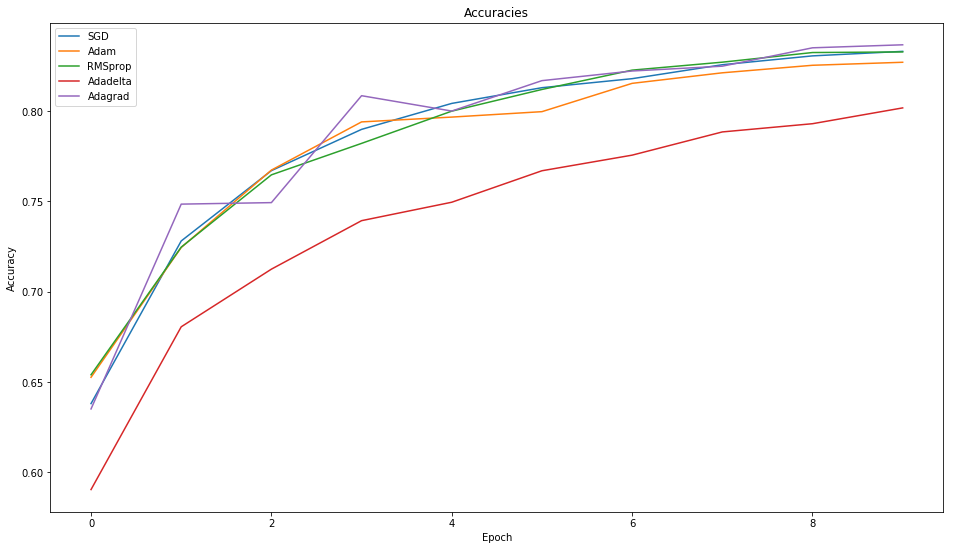

In [10]:
# ..................Accuracy vs Epochs plot with different optimizers...................
plt.plot(adadelta_val_averaged_accuracies)
plt.plot(rms_val_averaged_accuracies)
plt.plot(adam_val_averaged_accuracies)
plt.plot(sgd_val_averaged_accuracies)
plt.plot(adagrad_val_averaged_accuracies)
plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad'])
plt.savefig('Combined-Accuracy.jpg', dpi=200)

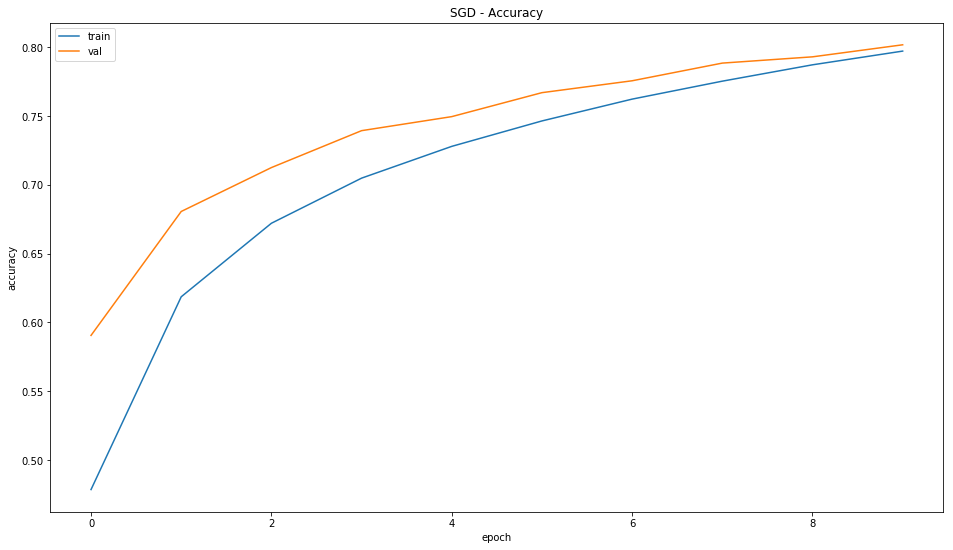

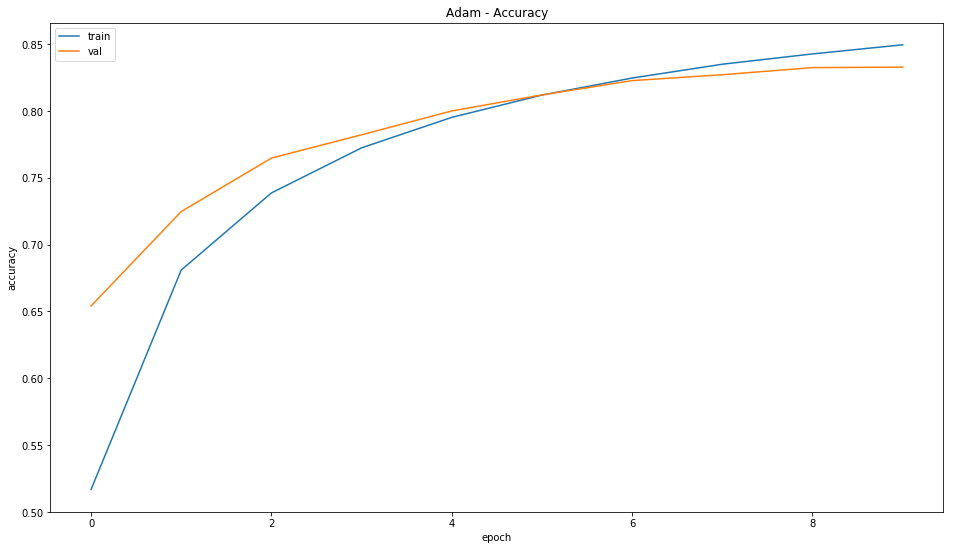

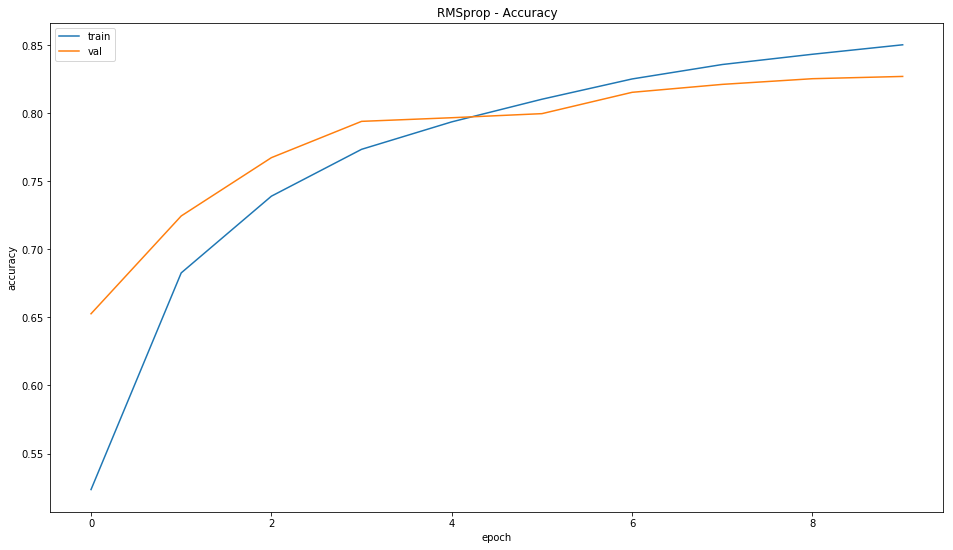

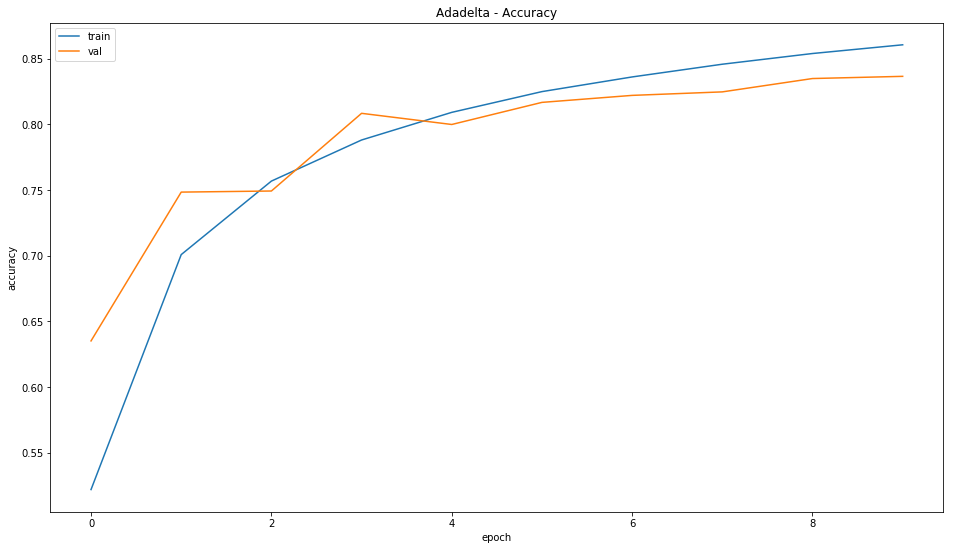

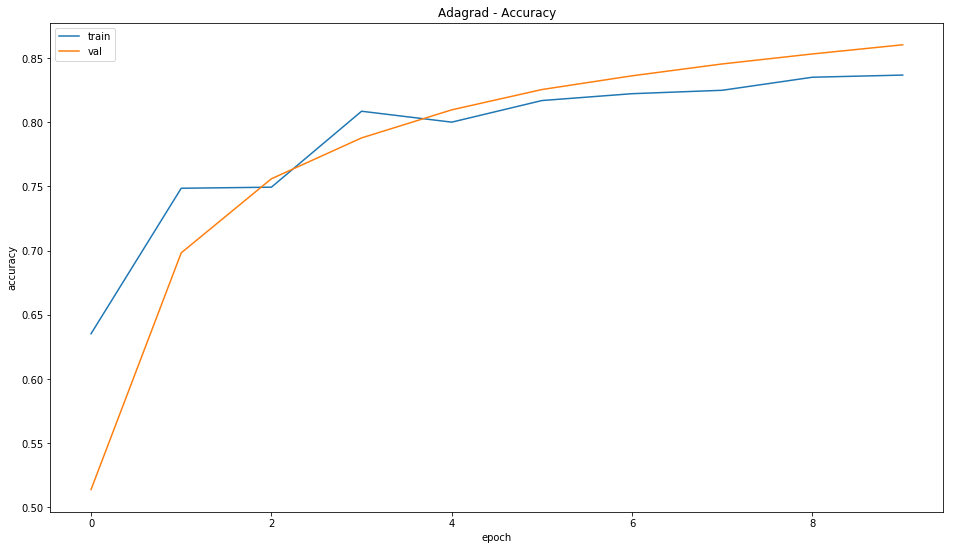

In [11]:
# SGD
plt.plot(sgd_train_averaged_accuracies)
plt.plot(sgd_val_averaged_accuracies)
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Adam
plt.plot(adam_train_averaged_accuracies)
plt.plot(adam_val_averaged_accuracies)
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Accuracy.jpg')
plt.show()


# RMSprop
plt.plot(rms_train_averaged_accuracies)
plt.plot(rms_val_averaged_accuracies)
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Accuracy.jpg')
plt.show()


# Adadelta
plt.plot(adadelta_train_averaged_accuracies)
plt.plot(adadelta_val_averaged_accuracies)
plt.title('Adadelta - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Accuracy.jpg')
plt.show()

# Adagrad
plt.plot(adagrad_val_averaged_accuracies)
plt.plot(adagrad_train_averaged_accuracies)
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Accuracy.jpg')
plt.show()
